<a href="https://colab.research.google.com/github/apatino16/NaturalLanguageProcessing/blob/main/APatino_Homework2_%5BNLP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Natural Language Processing* - Winter 2024 - Homework 2



> By Anny Patino




In [1]:
# Load Necessary Libraries

from textblob import TextBlob # Python library for processing textual data
import nltk # Natural Language Toolkit
nltk.download('punkt') # For tokenizing text into sentences and words
nltk.download('brown') # Brown Corpus, a collection of text samples from a wide range of sources
nltk.download('stopwords') # For accessing the list of stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Upload the RomeoJuliet.txt file from my computer to the virtual machine that Colab is running on

from google.colab import files

uploaded = files.upload()

Saving RomeoJuliet.txt to RomeoJuliet (6).txt


In [3]:
# Read the Romeo & Juliet text
# Retrieve only the first 1,000 characters from the text

textTotal = open('RomeoJuliet.txt').read()
blobTotal = TextBlob(textTotal) # Creates a TextBlob object for the entire text

numChars = 1000 # number of characters to focus on
text1000 = textTotal[0:numChars+1] # extracts the first 1,000 characters of the text
blob1000 = TextBlob(text1000) # Creates a TextBlob object of the first 1,000 characters

## Problem 1

Count and display the words in the first 1,000 characters of the text. Display all the words by printing 10 words per line.



In [4]:
# Display 10 words per line

for i, word in enumerate(blob1000.words):
  print(f"{i}. {word}",  end=', ')
  if (i + 1) % 10 ==0:
    print()
print()

# Print the total number of words
print('Count of words:', len(blob1000.words))

0. Project, 1. Gutenberg, 2. ’, 3. s, 4. Romeo, 5. and, 6. Juliet, 7. by, 8. William, 9. Shakespeare, 
10. This, 11. eBook, 12. is, 13. for, 14. the, 15. use, 16. of, 17. anyone, 18. anywhere, 19. in, 
20. the, 21. United, 22. States, 23. and, 24. most, 25. other, 26. parts, 27. of, 28. the, 29. world, 
30. at, 31. no, 32. cost, 33. and, 34. with, 35. almost, 36. no, 37. restrictions, 38. whatsoever, 39. You, 
40. may, 41. copy, 42. it, 43. give, 44. it, 45. away, 46. or, 47. re-use, 48. it, 49. under, 
50. the, 51. terms, 52. of, 53. the, 54. Project, 55. Gutenberg, 56. License, 57. included, 58. with, 59. this, 
60. eBook, 61. or, 62. online, 63. at, 64. www.gutenberg.org, 65. If, 66. you, 67. are, 68. not, 69. located, 
70. in, 71. the, 72. United, 73. States, 74. you, 75. ’, 76. ll, 77. have, 78. to, 79. check, 
80. the, 81. laws, 82. of, 83. the, 84. country, 85. where, 86. you, 87. are, 88. located, 89. before, 
90. using, 91. this, 92. ebook, 93. Title, 94. Romeo, 95. and, 96. J

## Problem 2

Count the words in the entire text.


In [5]:
print('Count of words:', len(blobTotal.words))

Count of words: 30796


# Problem 3

Count the unique words in the entire text.


In [6]:
total_unique_words = len(list(blobTotal.word_counts.items()))

print('Total unique words in the text = ', total_unique_words)

Total unique words in the text =  4145


# Problem 4
Count the unique words in the entire text after removing the stop-words from the list.


In [7]:
# Unique Words - Stop words

stop_words = set(stopwords.words('english'))

dict_uniqueWord_freq = blobTotal.word_counts.items()

list_uniqueWord_no_stop_freq = []
for item in dict_uniqueWord_freq:
  if item[0] not in stop_words:
    list_uniqueWord_no_stop_freq.append(item)
  #else:
   # print(item)
print()

print(' Total number of unique words in the text AFTER removing the stopwords: ', len(list_uniqueWord_no_stop_freq))


 Total number of unique words in the text AFTER removing the stopwords:  4017


# Problem 5
Print the top-10 words in the entire text with highest frequency. Also display words’ frequency.

In [8]:
from operator import itemgetter
sorted_items = sorted(list(dict_uniqueWord_freq), key=itemgetter(1), reverse= True)

numberTopWords = 10
top10Words = sorted_items[0:numberTopWords]

import pandas as pd

df = pd.DataFrame(top10Words, columns=['word', 'frequency'])

print(df)

   word  frequency
0   the        876
1     ’        869
2   and        808
3     i        655
4    to        626
5     a        542
6    of        519
7    in        395
8    is        372
9  that        369


# Problem 6
Print the top-10 words in the entire text with highest frequency after removing the stop-words from the list. Also display words’ frequency.

In [9]:
from operator import itemgetter
sorted_items = sorted(list_uniqueWord_no_stop_freq, key=itemgetter(1), reverse= True)

numberTopWords = 10
top10Words = sorted_items[0:numberTopWords]

import pandas as pd

df = pd.DataFrame(top10Words, columns=['word', 'frequency'])

print(df)

      word  frequency
0        ’        869
1    romeo        320
2     thou        278
3   juliet        195
4      thy        170
5  capulet        163
6    nurse        149
7     love        148
8     thee        138
9     lady        117


# Problem 7
Count and display the noun-phrases in the first 1,000 characters of the text. Display all the noun-phrases by printing 3 noun-phrases per line.

In [12]:
# Display 3 noun-phrases per line

for i, phrase in enumerate(blob1000.noun_phrases):
  print(f"{i}. {phrase}",  end=', ')
  if (i + 1) % 3 == 0:
    print()
print()

0. project gutenberg, 1. ’ s, 2. romeo, 
3. juliet, 4. william shakespeare, 5. restrictions whatsoever, 
6. project gutenberg license, 7. ’ ll, 8. title, 
9. romeo, 10. juliet author, 11. william shakespeare release date, 
12. november, 13. etext, 14. updated, 
15. january, 16. language, 17. english character, 
18. utf-8, 19. * * *, 20. start of this project gutenberg ebook romeo and juliet, 
21. * * *, 22. pg shakespeare team, 23. project gutenberg, 
24. the tragedy of romeo and juliet, 25. william shakespeare contents the prologue, 26. act, 
27. scene, 28. public place, 29. scene ii, 
30. sc, 


# Problem 8
Count the noun-phrases in the entire text.



In [11]:
print(len(blobTotal.noun_phrases))

5039


# Problem 9
Print the top-10 noun-phrases in the entire text with highest frequency. Also display noun-phrases’ frequency.

In [18]:
dictionary = blobTotal.np_counts

rankedlist = sorted( dictionary, key = dictionary.get, reverse= True)

for i in range(0, 10):
  key = rankedlist[i]
  value = dictionary[key]
  print( key + ' ' + str(value) + ' times')

romeo 297 times
juliet 177 times
nurse 132 times
capulet 106 times
’ s 98 times
mercutio 86 times
tybalt 75 times
benvolio 72 times
friar lawrence 69 times
’ ll 68 times


# Problem 10
Print the words in the entire text that contain a string “WA”.

In [19]:
for word in blobTotal.words:
  if "WA" in word:
    print(word)

WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WATCH
WARRANTY
WARRANTY
WARRANTIES
WARRANTIES


# Problem 11
Visualize Word Frequencies. Create WordClouds for the entire text. Use a mask.


In [22]:
# Visualizing Word Frequencies with WordClouds

# Upload the mask png file

from google.colab import files
uploaded = files.upload()

Saving mask_heart.png to mask_heart.png


<ipython-input-30-98b99974c4e3>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(str('mask_heart.png'))


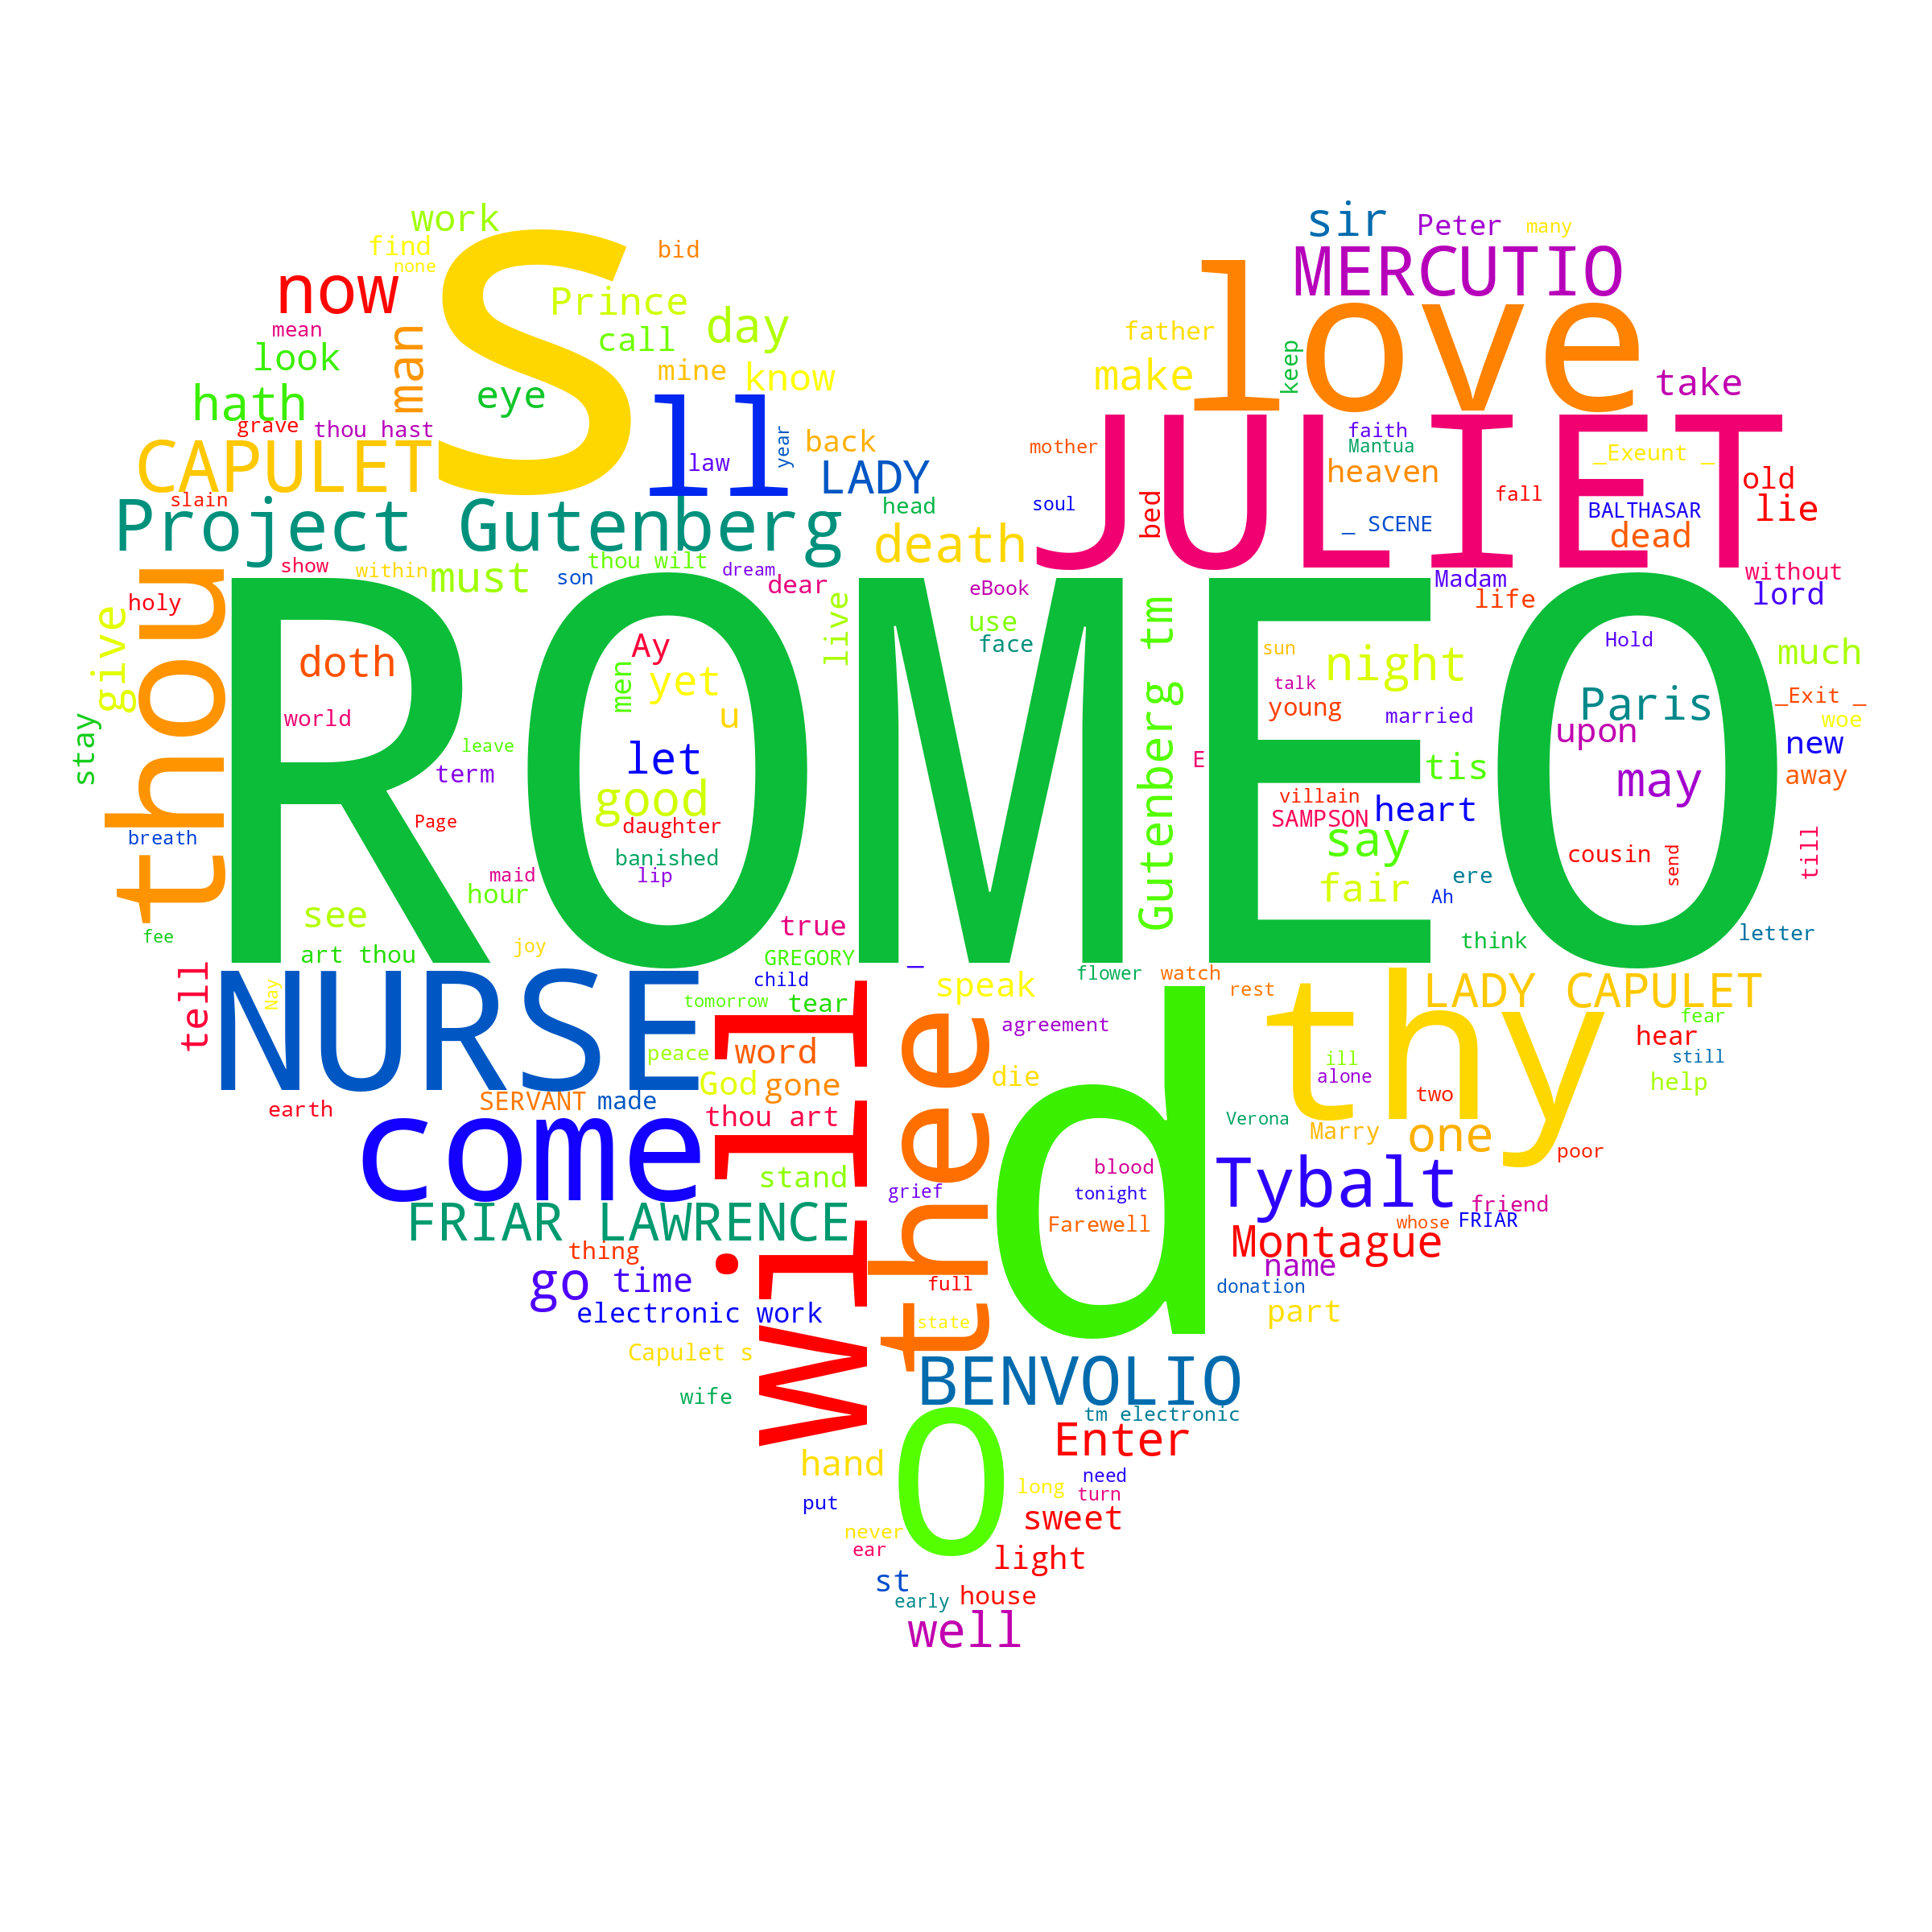

In [30]:
import imageio
mask_image = imageio.imread(str('mask_heart.png'))

from wordcloud import WordCloud

wordcloud = WordCloud(colormap= 'prism', mask = mask_image, background_color='white' )
wordcloudImage = wordcloud.generate(str(blobTotal))

wordcloudImage.to_image()